In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 -4*x + 5
f(3.0)

20.0

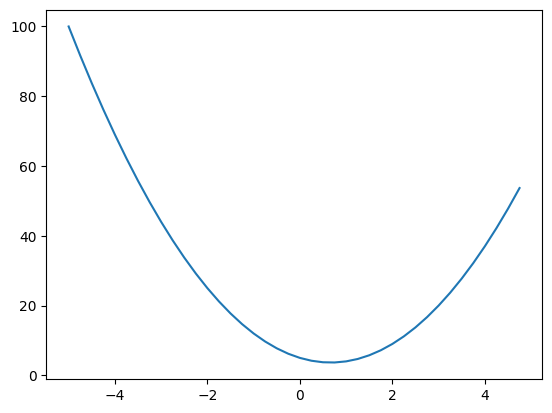

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Derivate is defined as : 

$$L =  \lim_{h\to 0} \frac{f(a+h)-f(a)}{h} $$

In [5]:
h = 0.00000001
x = 3.0
(f(x + h) - f(x))/h 

14.00000009255109

If we slightly nudge x in a positive direction how is 
the function going to respond, So here you are moving towards `3 plus
something` , that means the function is going to increase in the direction by looking at the graph, so your slope is positive, slope measures unit change you normalise the change by dividing by h.

In [6]:
h = 0.00000001
x = -3.0
(f(x + h) - f(x))/h 

-22.00000039920269

If we slightly nudge x in a positive direction how is the function going to respond, So here you are moving towards `-3 plus something` , that means the function is going to decrease in the direction by looking at the graph, so your slope is negative.

In [7]:
h = 0.00000001
x = 2/3
(f(x + h) - f(x))/h 

0.0

At this particular point `x = 2/3` , the function does not respond remains the same if we nudge it in the positive or negative direction a bit. So the slope is zero here.

example 2

In [8]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [9]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print(f"d1 : {d1}")
print(f"d2 : {d2}")
print(f"slope : {(d2-d1)/h}")

d1 : 4.0
d2 : 3.999699999999999
slope : -3.000000000010772


This is the derivate of the function d with respect to a : which says how much the function d responds if we nudge a. In this case the change reduces the function and so the slope is negative.

In [10]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print(f"d1 : {d1}")
print(f"d2 : {d2}")
print(f"slope : {(d2-d1)/h}")

d1 : 4.0
d2 : 4.0002
slope : 2.0000000000042206


In [11]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print(f"d1 : {d1}")
print(f"d2 : {d2}")
print(f"slope : {(d2-d1)/h}")

d1 : 4.0
d2 : 4.0001
slope : 0.9999999999976694


#### Neural Networks Data Structure Objects

In [12]:
class Value:
    
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data = {self.data})"

a = Value(2.0)
a

Value(data = 2.0)

In [13]:
b = Value(-3.0)
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

So here above we really can't add two Value objects so we should define `__add__`

In [14]:
class Value:
    
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        return Value(self.data + other.data)

a = Value(2.0)
b = Value(-3.0)
print(a + b)

Value(data = -1.0)


Here lets also added multiply function using `__mul__`

In [15]:
class Value:
    
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out
        

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
print(a * b + c)

Value(data = 4.0)


Now we also want to know from an expression what its children are , that is what values we used it to create this expression


In [16]:
class Value:
    
    def __init__(self, data, _children = ()):
        self.data = data
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data , (self, other))
        return out
        

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
print(d._prev)

{Value(data = -6.0), Value(data = 10.0)}


We also want to know which operation between the operands were performed in `._prev` operands, so for that we maintain a `_op` value variable which stands for operation.

In [17]:
class Value:
    
    def __init__(self, data, _children = (), _op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data , (self, other), "*")
        return out
        

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
print(d._prev, d._op)

{Value(data = -6.0), Value(data = 10.0)} +


Now we are at a point where we want to visualize the operations in a graph from the leaves to the root in some sense. So we create a utility using the `graphviz` library.

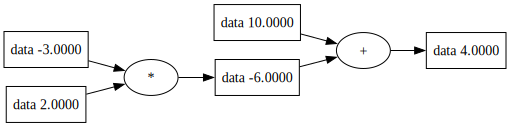

In [34]:
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set() , set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr = {'rankdir' : 'LR'}) # LR -> Left to Right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{data %.4f}" % (n.data), shape = 'record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot
draw_dot(d)

Also lets add a lable so as to see which node corresponds to which variable.

In [46]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data , (self, other), "*")
        return out
        

a = Value(2.0, label ='a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b
e.label ='e'
d = e + c
d.label = 'd'
f = Value(-2.0, label ='f')
L = d*f
L.label = 'L'
L

Value(data = -8.0 , Label = L)

The trace function takes the root of the node and creates all nodes and edges of the nodes

The draw_dot function takes these nodes and edges and creates a tree diagram in graphviz.

In [49]:
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set() , set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr = {'rankdir' : 'LR'}) # LR -> Left to Right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f}" % (n.label, n.data), shape = 'record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

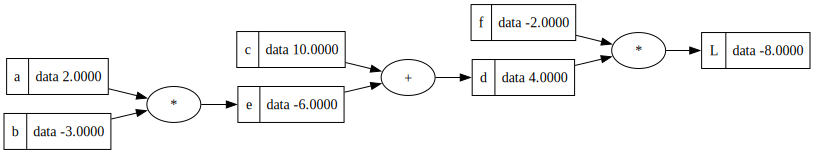

In [50]:
draw_dot(L)

This above graph basically is called the forward pass 
in neural networks terminology. Now based on the forward pass we should also create grad which is nothing but derivate of each parameter with respect to the loss that is lets say `L` in this case.

In [51]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data , (self, other), "*")
        return out
        

a = Value(2.0, label ='a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b
e.label ='e'
d = e + c
d.label = 'd'
f = Value(-2.0, label ='f')
L = d*f
L.label = 'L'
L

Value(data = -8.0 , Label = L)

In [52]:
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set() , set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr = {'rankdir' : 'LR'}) # LR -> Left to Right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

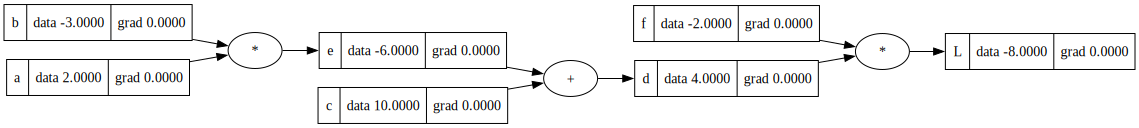

In [53]:
draw_dot(L)

So now we want to create a staging area, where we want to check our function , changing each parameter and measuring the grad.


In [56]:
def lol():
    h = 0.001
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L2 = L.data + h
    
    print((L2-L1)/h)

lol()
    

1.000000000000334


In [57]:
#so 
L.grad = 1.0

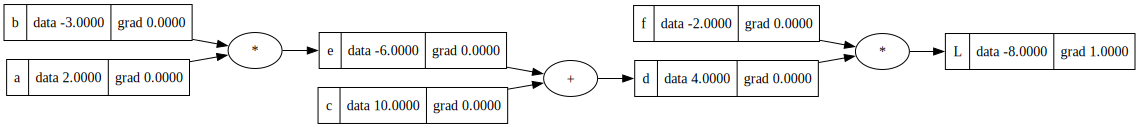

In [58]:
draw_dot(L)

Now what is grad of d ?

$$L = d * f$$

$$\frac{dL}{dd} = f$$

$$\frac{f(x+h) - f(x)}{h}$$

$$\frac{(d+h) * f - d*f}{h}$$

$$\frac{h*f}{h} = f$$


Similarly here f's grad is d.

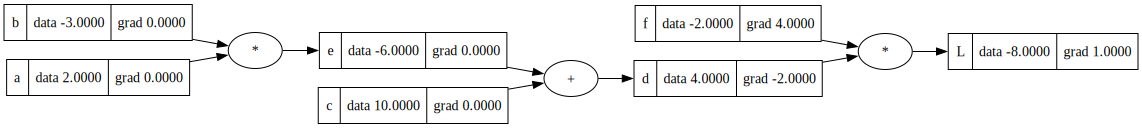

In [59]:
d.grad = -2.0
f.grad = 4.0
draw_dot(L)

We can also cross check empirically using the lol function we created here to verify and grads of `d` and `f`.

In [61]:
def lol():
    h = 0.001
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    d.data+=h
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)

lol() # grad d

-2.000000000000668


In [62]:
def lol():
    h = 0.001
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    f.data+=h
    L = d*f
    L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)

lol() # grad f

3.9999999999995595


Now we need to derive $$\frac{dL}{dc}$$

detour : 

To do this we should know something called `chain rule` of calculus which is 

$$\frac{dz}{dx} = \frac{dz}{dy} . \frac{dy}{dx}$$

Intuitively the chain rule states that knowing the instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaneous rate of change of z relative to x as the product of the two rates of change.

If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels `2 * 4 = 8` times as fast as the man.


so back from the detour and applying to our current problem.

$$\frac{dL}{dc} = \frac{dL}{dd} . \frac{dd}{dc}$$


In [63]:
c.grad = -2.0
e.grad = -2.0

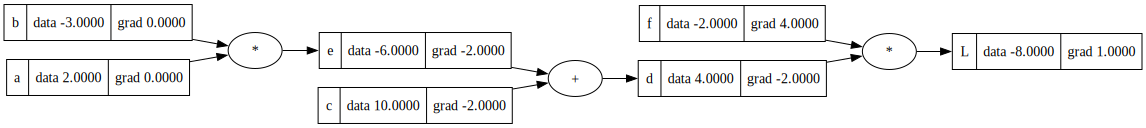

In [64]:
draw_dot(L)

Quick observation : In case of addition the grad just flows to its constituent elements without change.

In [66]:
def lol():
    h = 0.001
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    c.data+=h
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    
    L = d*f
    L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)

lol() # grad c

-1.9999999999988916


In [67]:
def lol():
    h = 0.001
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    
    e = a*b
    e.data+=h
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    
    L = d*f
    L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)

lol() # grad e

-2.000000000000668


Now we want

$$\frac{dL}{da} = \frac{dL}{de} . \frac{de}{da}$$
$$\frac{dL}{db} = \frac{dL}{de} . \frac{de}{db}$$

In [79]:
b.grad = -2.0 * 2.0
a.grad = -2.0 * -3.0

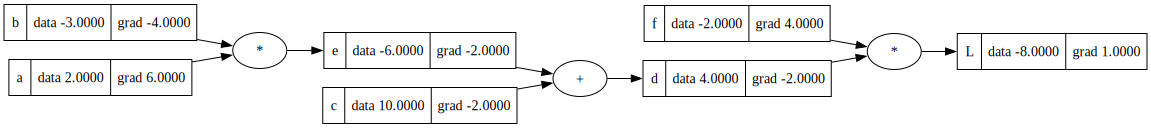

In [80]:
draw_dot(L)

In [81]:
def lol():
    h = 0.001
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    a.data+=h
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    
    L = d*f
    L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)

lol() # grad a

6.000000000000227


In [82]:
def lol():
    h = 0.001
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    L = d*f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    b = Value(-3.0, label = 'b')
    b.data+=h
    c = Value(10.0, label = 'c')
    
    e = a*b
    e.label ='e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label ='f')
    
    L = d*f
    L.label = 'L'
    L2 = L.data
    print((L2-L1)/h)

lol() # grad b

-3.9999999999995595


This completes the back propogation for this example all the way from root `L` to initial leaves of the tree `a` , `b`

Here the actual parameters that we can nudge by a tiny amount and see what happens in the forward pass , we expect the value of L to decrease if we move in the direction of gradient

In [83]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

# forward pass
e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


Now lets focus on an actual neural network , which is same as the above with a non linearity function added in. you have the parameters , you have the inputs , You take the dot product of parameters with inputs and then apply a non-linearity function like say for instance `tanh` and then apply back propogation

<img src ='./images/neuralnet.png' ></img>


$$out = \sum_{i=1}^{i=n} w_i . x_i  --> tanh(out) --> \hat{y}$$ 

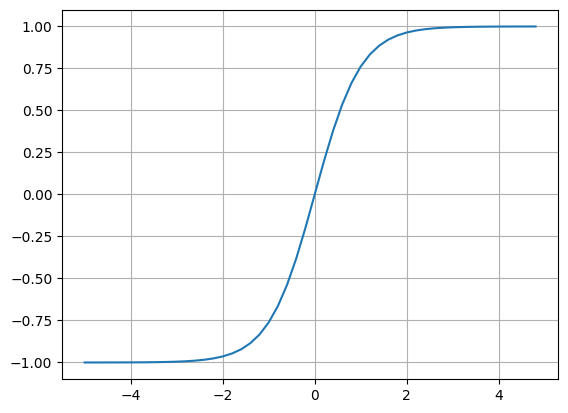

In [84]:
#tanh
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5,5,0.2)));
plt.grid()

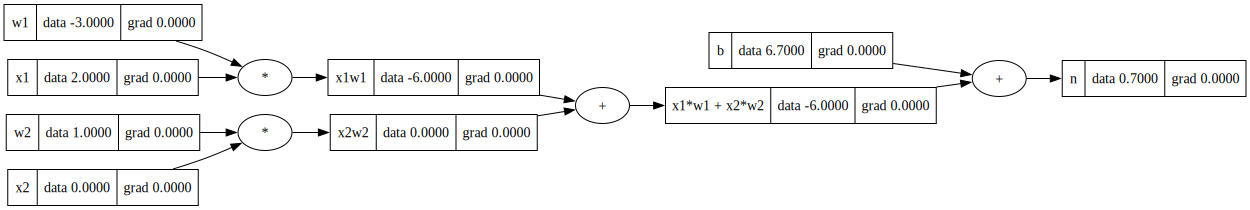

In [85]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(6.7, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

draw_dot(n)

Now lets implement tanh which involves exponenential in our Value class

In [86]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data , (self, other), "*")
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        return out

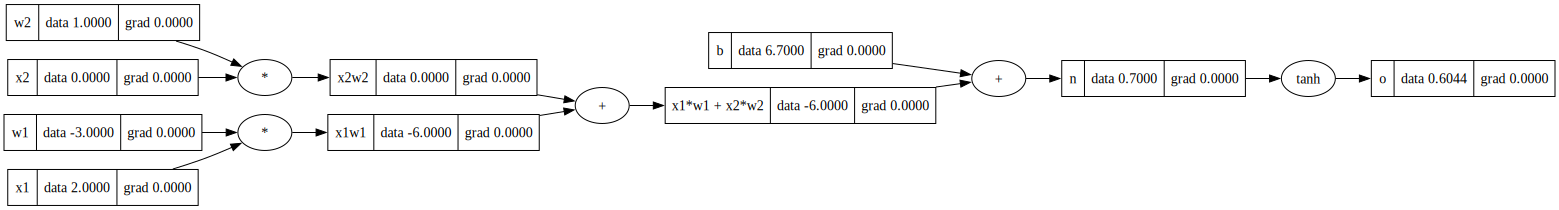

In [87]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(6.7, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

So here tanh's capability to squash any large inputs that are coming into the network , for instance lets increase our bias to 8.0 which would make our n to 2.0 lets verify if tanh can squash it

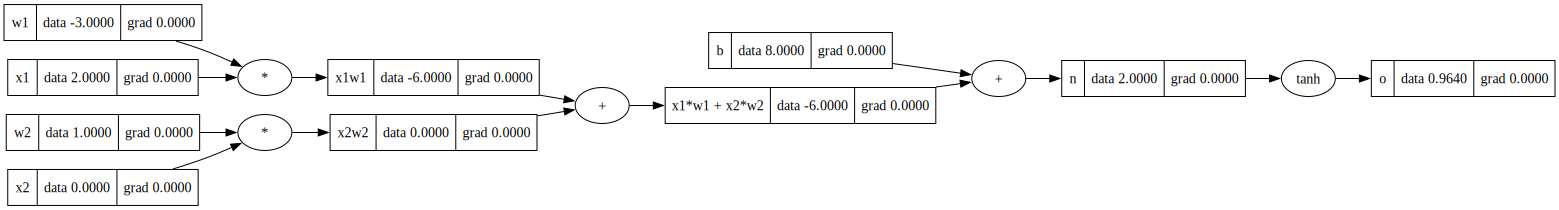

In [88]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(8.0, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

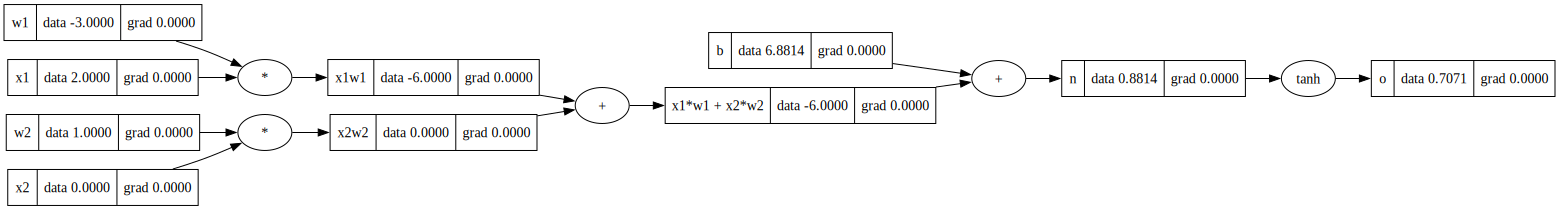

In [89]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(6.8813735870195432, label = 'b') # hack to make backpropogation smooth.

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [90]:
o.grad = 1.0

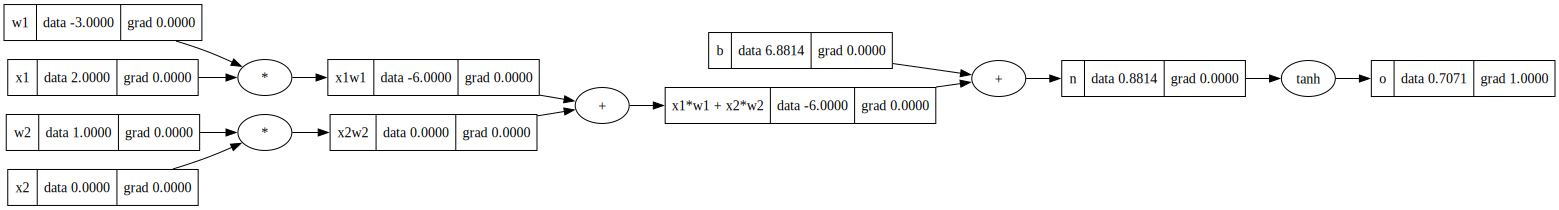

In [91]:
draw_dot(o)

In order to do the backprop, we should know the derivate of tanh(x) which is given below as follows.

$$\frac{dtanh(x)}{dx} = 1-tanh^2(x)$$

In [92]:
#so here do/dn

1 - o.data**2

0.4999999999999999

In [93]:
n.grad = 0.5

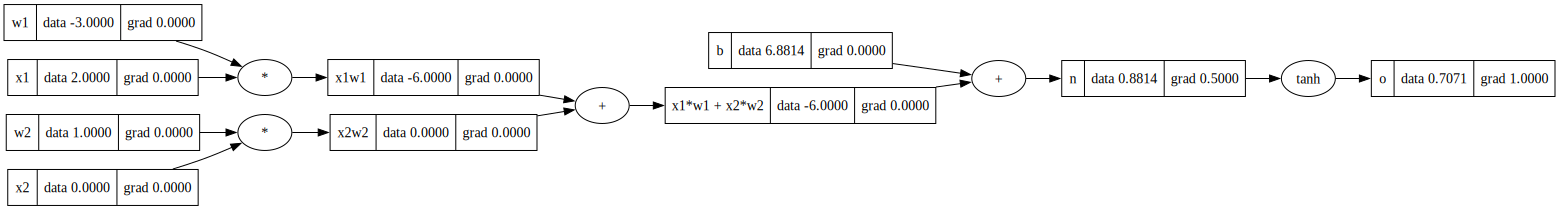

In [94]:
draw_dot(o)

The grad of x1w1x2w2 and b is set from n.grad since its an addition operation

In [95]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

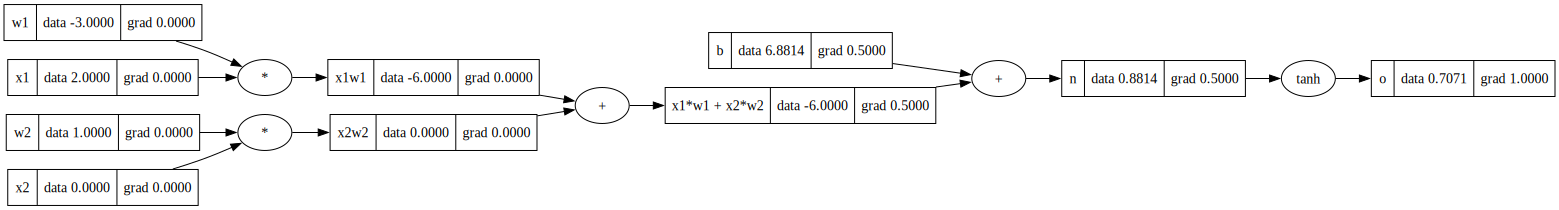

In [96]:
draw_dot(o)

Similarly the grad of x1w1 and x2w2 is set from x1w1x2w2.grad since its an addition operation again.

In [97]:
x1w1.grad = 0.5
x2w2.grad = 0.5

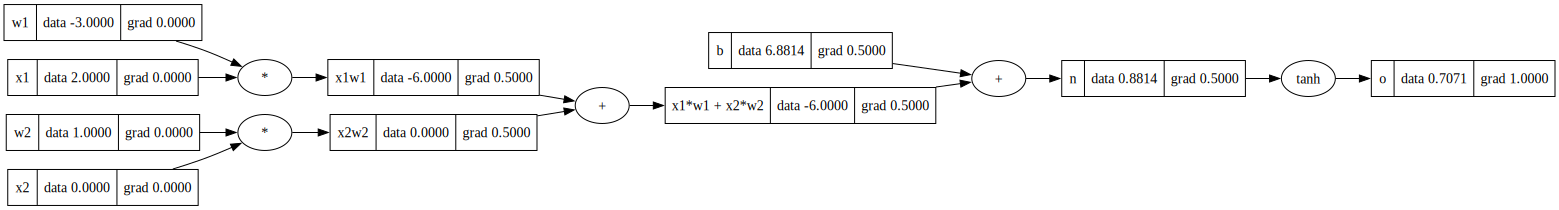

In [98]:
draw_dot(o)

In [99]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [100]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

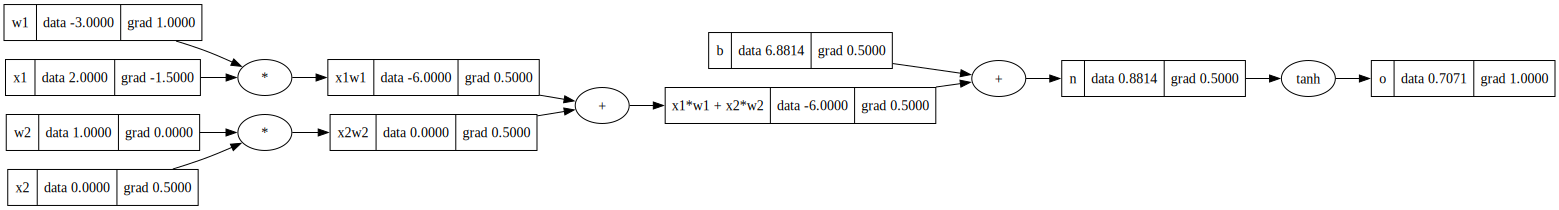

In [101]:
draw_dot(o)

Now we will try to make the back propogation little more automatic.

In [106]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad = (1.0 - t**2) * out.grad
        out._backward = _backward
        return out

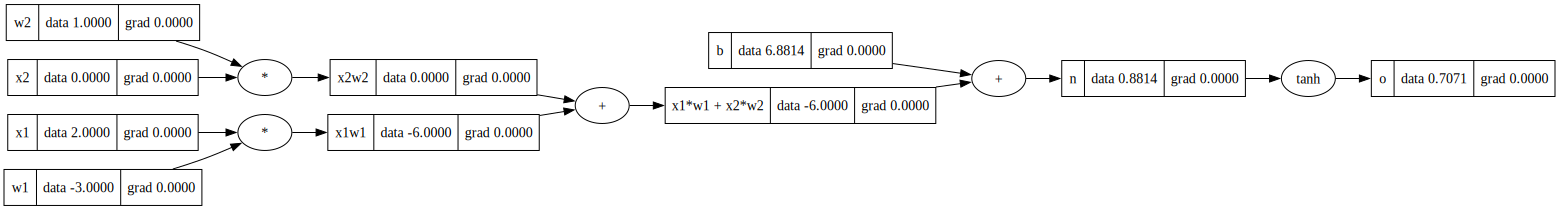

In [107]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(6.8813735870195432, label = 'b') # hack to make backpropogation smooth.

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

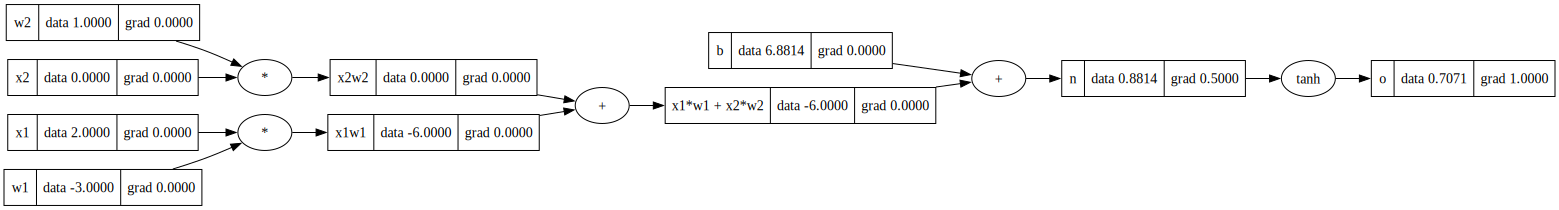

In [109]:
o.grad = 1.0
o._backward()
draw_dot(o)

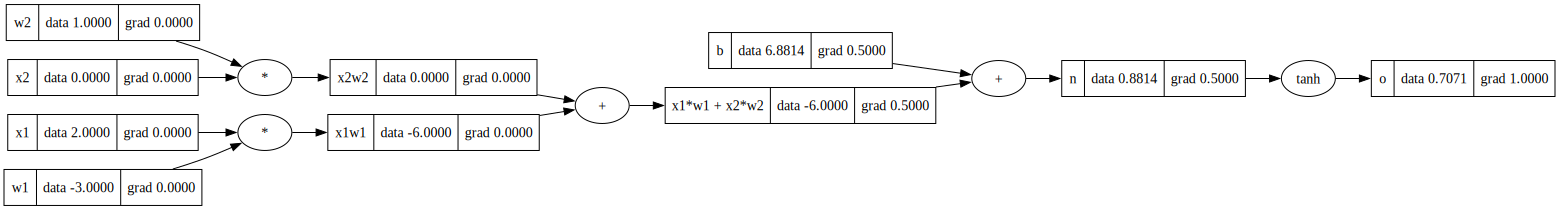

In [111]:
n._backward()
draw_dot(o)

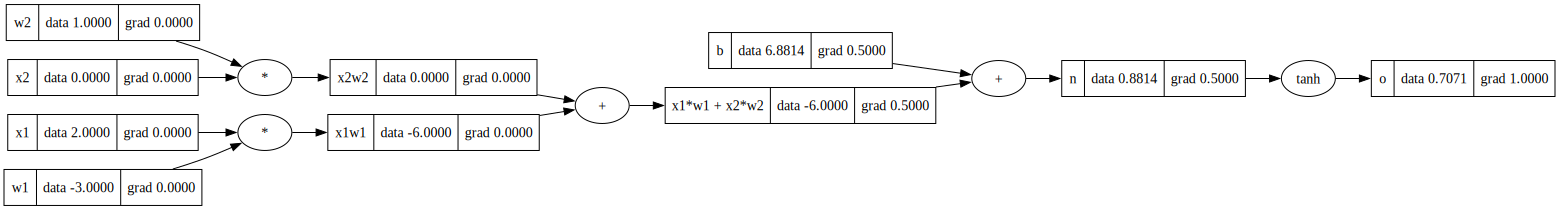

In [112]:
b._backward() # nothing happens here
draw_dot(o)

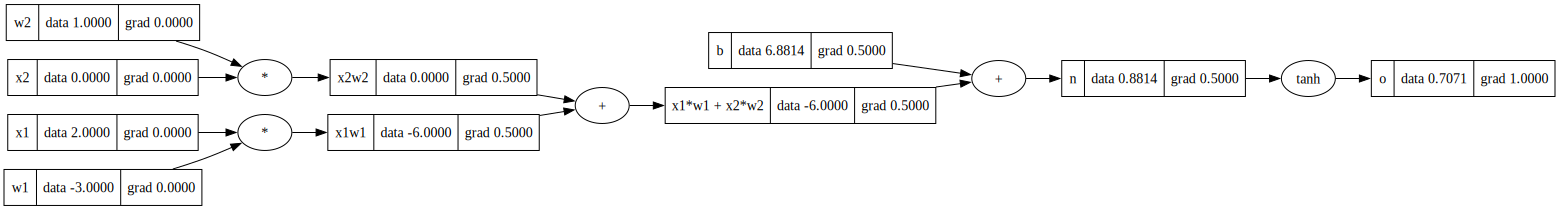

In [113]:
x1w1x2w2._backward()
draw_dot(o)

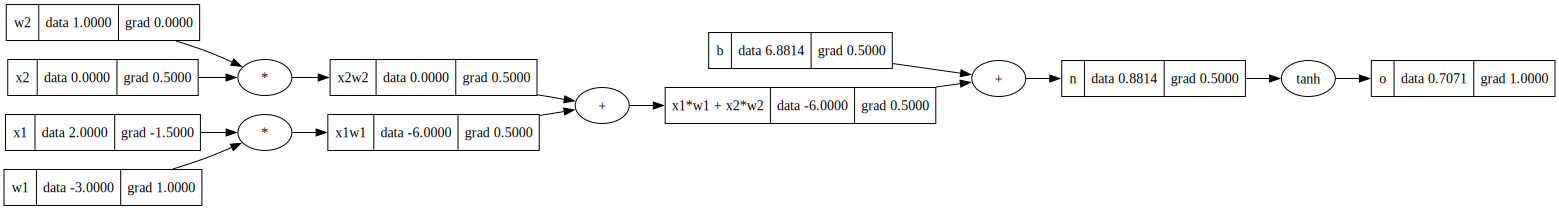

In [114]:
x2w2._backward()
x1w1._backward()
draw_dot(o)

Now we want to do this for the entire graph , we have to do the topological sort starting from the root node to the leave nodes.

In [121]:
#topological sort. You are only going to be in the list if
# all of your children are going to be in the list.
topo = []
visited = set ()
def build_topo(v):
    if v not in visited: 
        visited.add(v)
        for child in v._prev: 
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data = 6.881373587019543 , Label = b),
 Value(data = 2.0 , Label = x1),
 Value(data = -3.0 , Label = w1),
 Value(data = -6.0 , Label = x1w1),
 Value(data = 1.0 , Label = w2),
 Value(data = 0.0 , Label = x2),
 Value(data = 0.0 , Label = x2w2),
 Value(data = -6.0 , Label = x1*w1 + x2*w2),
 Value(data = 0.8813735870195432 , Label = n),
 Value(data = 0.7071067811865476 , Label = o)]

Now lets reset the gradients and do this again.

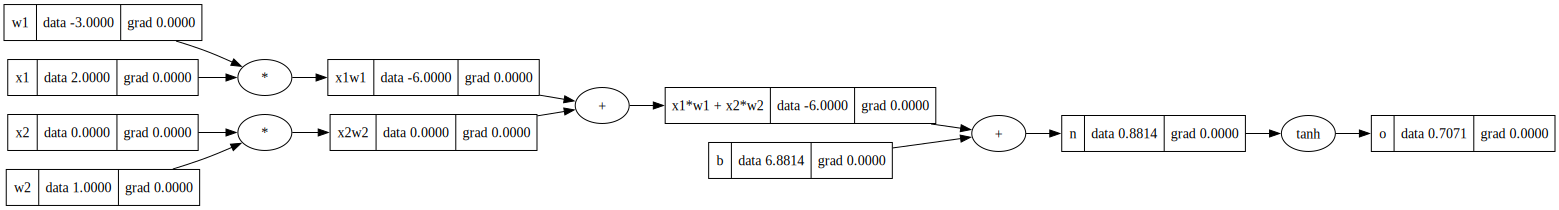

In [122]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(6.8813735870195432, label = 'b') # hack to make backpropogation smooth.

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

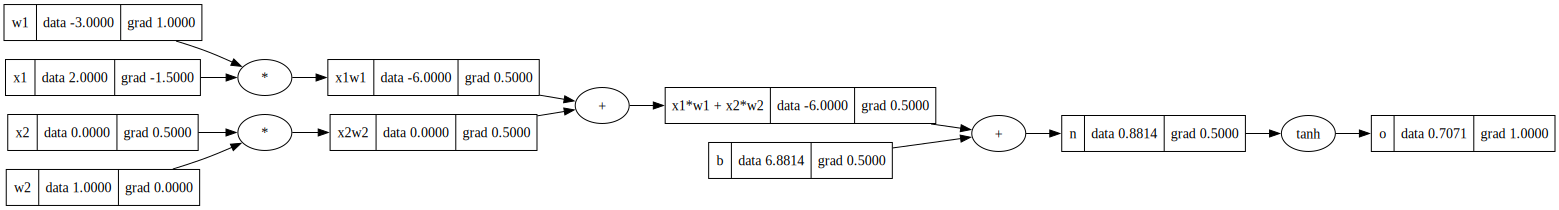

In [123]:
o.grad = 1.0

topo = []
visited = set ()
def build_topo(v):
    if v not in visited: 
        visited.add(v)
        for child in v._prev: 
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

draw_dot(o)

Now lets hide the backward functionality using topological sort in the class.

In [133]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad = (1.0 - t**2) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

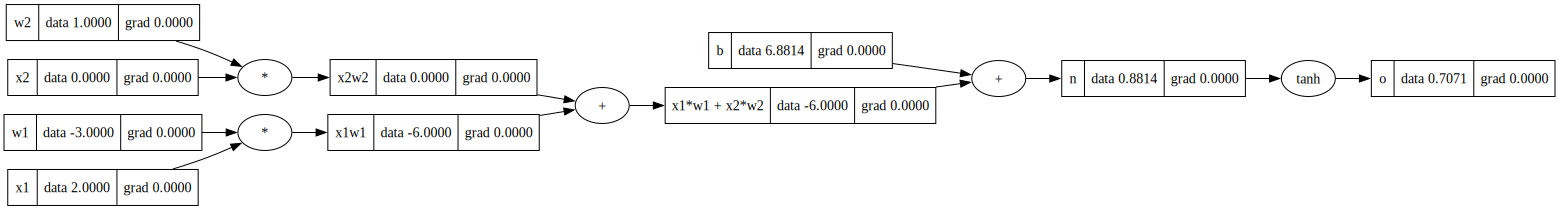

In [134]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(6.8813735870195432, label = 'b') # hack to make backpropogation smooth.

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

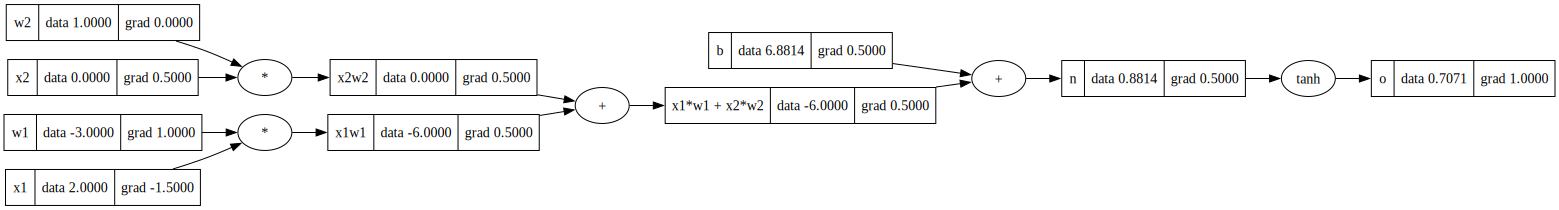

In [135]:
o.backward()
draw_dot(o)

Fixing a bug , which occurs whenever we use a variable more than once , the grad calculation fails.

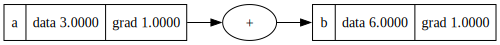

In [136]:
a = Value(3.0, label ='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)


Here the gradient should have been 2, but it branches out and grad gets divided and results in 1. Lets look at one more example.

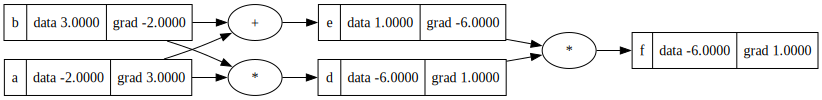

In [139]:
a = Value(-2.0, label ='a')
b = Value(3.0, label ='b')
d = a * b ; d.label = 'd'
e = a + b ; e.label = 'e'
f = d * e ; f.label = 'f'

f.backward()
draw_dot(f)


The gradient till d and e is fine. But when e calls backwards it writes the gradient in a and b , After it writes d calls again backwards and replaces the existing gradients and re-writes the new gradients which is not right. So the solution for this is to accumulate gradients from both passes.

In [140]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad # accumulating gradients
            other.grad += 1.0 * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad # accumulating gradients
            other.grad += self.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1.0 - t**2) * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

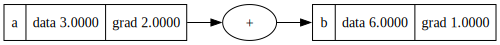

In [142]:
a = Value(3.0, label ='a')
b = a + a; b.label='b'
b.backward()
draw_dot(b)

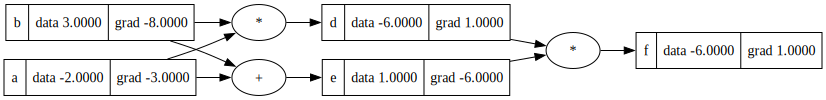

In [141]:
a = Value(-2.0, label ='a')
b = Value(3.0, label ='b')
d = a * b ; d.label = 'd'
e = a + b ; e.label = 'e'
f = d * e ; f.label = 'f'

f.backward()
draw_dot(f)

Now we want to break the tanh function into its constituent parts using e**x and implement it, with an intention to exercising more operations

But first resolve a subtle issue below

In [143]:
Value(2.0) + Value(3.0)

Value(data = 5.0 , Label = )

In [144]:
# but we cant do this
Value(2.0) + 1.0

AttributeError: 'float' object has no attribute 'data'

In [146]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad # accumulating gradients
            other.grad += 1.0 * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad # accumulating gradients
            other.grad += self.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1.0 - t**2) * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [147]:
# but we cant do this
Value(2.0) + 1.0

Value(data = 3.0 , Label = )

But now we can do the below , since when we call `__ add __` on `a` and `b` , the execution proceeds in the order of 

`a.__ add __(b)`

In [149]:
1.0 * Value(2.0)  # 1.__mul__(Value(2.0))

TypeError: unsupported operand type(s) for *: 'float' and 'Value'

The way to deal with this issue is to use something called `__ rmul __ ` which is basically a fallback when `__ mul __` fails.

In [156]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad # accumulating gradients
            other.grad += 1.0 * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __radd__(self,other): # other + self -> fallback for __add__
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad # accumulating gradients
            other.grad += self.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __rmul__(self,other): # other * self -> fallback for __mul__
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1.0 - t**2) * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [157]:
1 + Value(2.0)

Value(data = 3.0 , Label = )

In [158]:
1 * Value(2.0)

Value(data = 2.0 , Label = )

Now lets implement the exponentiation function

In [160]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad # accumulating gradients
            other.grad += 1.0 * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __radd__(self,other): # other + self -> fallback for __add__
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad # accumulating gradients
            other.grad += self.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __rmul__(self,other): # other * self -> fallback for __mul__
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1.0 - t**2) * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [161]:
a = Value(2.0)
a.exp()

Value(data = 7.38905609893065 , Label = )

Now we also have to implement division , the way we can think about division is as follows

a/b is same as a * (1/b) which is same as a * b**-1

In [163]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad # accumulating gradients
            other.grad += 1.0 * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __radd__(self,other): # other + self -> fallback for __add__
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad # accumulating gradients
            other.grad += self.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __rmul__(self,other): # other * self -> fallback for __mul__
        return self * other

    def __truediv_(self, other): # self/other
        return self * other**-1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1.0 - t**2) * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

Now lets also add pow function 

In [182]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad # accumulating gradients
            other.grad += 1.0 * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __radd__(self,other): # other + self -> fallback for __add__
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad # accumulating gradients
            other.grad += self.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only support int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad +=(other * self.data**(other-1)) * out.grad
        out._backward = _backward
        return out
            

    def __rmul__(self,other): # other * self -> fallback for __mul__
        return self * other

    def __truediv__(self, other): # self/other
        return self * other**-1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1.0 - t**2) * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [183]:
a = Value(2.0, label = 'a')
b = Value(4.0 , label = 'b')
a / b

Value(data = 0.5 , Label = )

We also need to implement subtract

In [184]:
a - b

TypeError: unsupported operand type(s) for -: 'Value' and 'Value'

In [192]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', label =''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data} , Label = {self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data + other.data, (self, other), "+")
        def _backward():
            self.grad += 1.0 * out.grad # accumulating gradients
            other.grad += 1.0 * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)

    def __radd__(self,other): # other + self -> fallback for __add__
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # handled here
        out = Value(self.data * other.data , (self, other), "*")
        def _backward():
            self.grad += other.data * out.grad # accumulating gradients
            other.grad += self.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only support int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad +=(other * self.data**(other-1)) * out.grad
        out._backward = _backward
        return out
            

    def __rmul__(self,other): # other * self -> fallback for __mul__
        return self * other

    def __truediv__(self, other): # self/other
        return self * other**-1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1.0 - t**2) * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad # accumulating gradients
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [189]:
a = Value(2.0, label = 'a')
b = Value(4.0 , label = 'b')
a - b

Value(data = -2.0 , Label = )

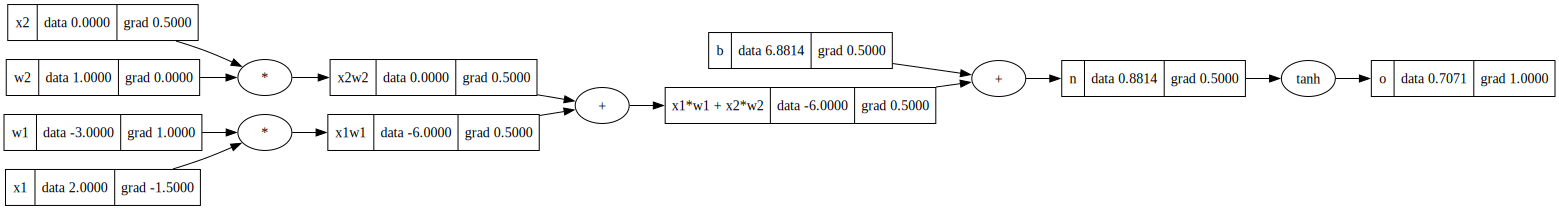

In [193]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(6.8813735870195432, label = 'b') # hack to make backpropogation smooth.

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)

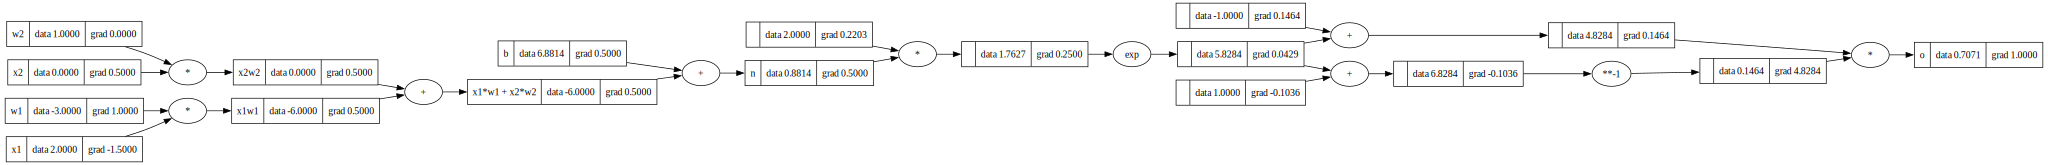

In [194]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

# bias for the neuron
b = Value(6.8813735870195432, label = 'b') # hack to make backpropogation smooth.

# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1w1'
x2w2 = x2*w2 ; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#-----
e = (2*n).exp()
o = (e-1)/(e+1)
o.label = 'o'
#--------
o.backward()
draw_dot(o)

The name same thing in Pytorch Loop

In [196]:
import torch
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double();  w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double();b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


Now lets shift gears and build out a multilayer perceptron in python.

In [198]:
import random

In [199]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        # w* x + b
        return 0.0

x = [2.0, 3.0]
n = Neuron(2)
n(x) # This calls the __call__ function (no pun intended)

0.0

In [201]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        # w* x + b
        # sum actually can take one more parameter which
        # can start the sum from that value 
        # This is equivalent to sum(wi*xi for wi, xi in zip(self.w,x)) + self.b
        # to this sum(wi*xi for wi, xi in zip(self.w,x), self.b)
        act = sum([wi*xi for wi, xi in zip(self.w,x)], self.b)
        out = act.tanh()
        return out

x = [2.0, 3.0]
n = Neuron(2)
n(x) # This calls the __call__ function (no pun intended)

Value(data = 0.8819039290259774 , Label = )

Now lets talk about the layers of the Neural Network

In [202]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        # w* x + b
        # sum actually can take one more parameter which
        # can start the sum from that value 
        # This is equivalent to sum(wi*xi for wi, xi in zip(self.w,x)) + self.b
        # to this sum(wi*xi for wi, xi in zip(self.w,x), self.b)
        act = sum([wi*xi for wi, xi in zip(self.w,x)], self.b)
        out = act.tanh()
        return out

class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

x = [2.0, 3.0]
n = Layer(2, 3)
n(x) # This calls the __call__ function (no pun intended)

[Value(data = -0.9149065148252056 , Label = ),
 Value(data = -0.5984170168616012 , Label = ),
 Value(data = 0.9991972760237054 , Label = )]

Now lets build the mlp (multilayer perceptron)

In [209]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        # w* x + b
        # sum actually can take one more parameter which
        # can start the sum from that value 
        # This is equivalent to sum(wi*xi for wi, xi in zip(self.w,x)) + self.b
        # to this sum(wi*xi for wi, xi in zip(self.w,x), self.b)
        act = sum([wi*xi for wi, xi in zip(self.w,x)], self.b)
        out = act.tanh()
        return out

class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x) # This calls the __call__ function (no pun intended)

Value(data = -0.2626179867832386 , Label = )

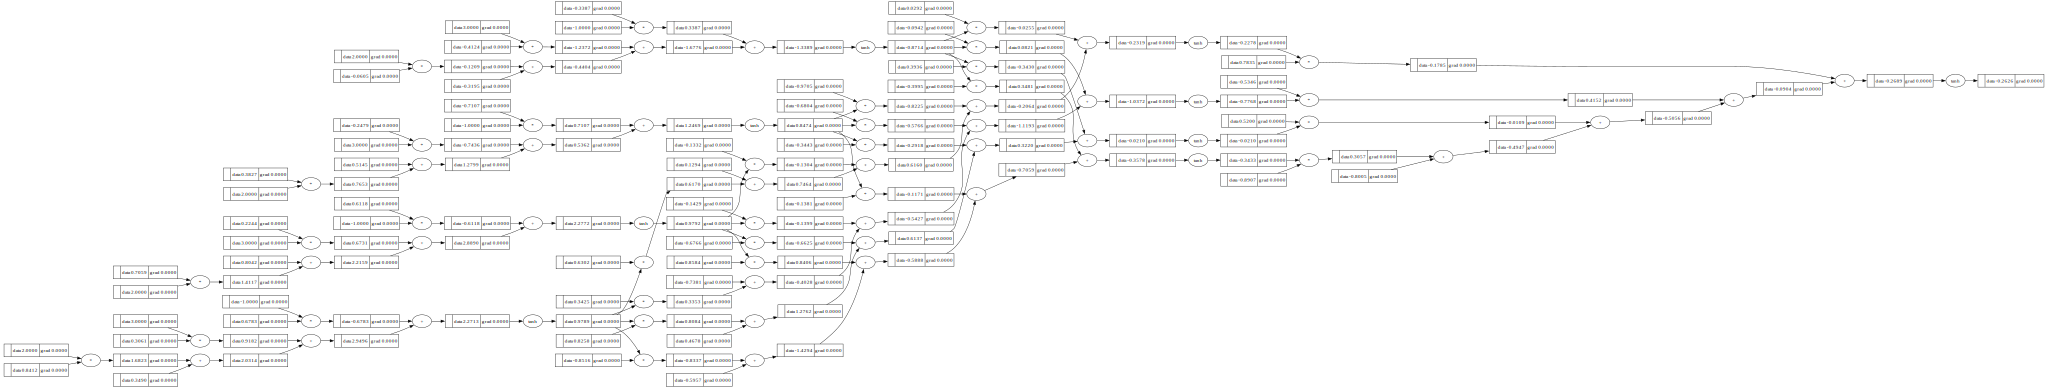

In [210]:
draw_dot(n(x))

Lets create some small dataset to test our neural network

In [211]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0 , -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # Desired targets


In [212]:
ypred = [n(x) for x in xs]
ypred

[Value(data = -0.2626179867832386 , Label = ),
 Value(data = 0.016994836736855104 , Label = ),
 Value(data = 0.25073440667289665 , Label = ),
 Value(data = -0.29480621944395624 , Label = )]

In [214]:
loss = sum([(yout - ygt)**2 for ygt , yout in zip(ys, ypred)])
loss


Value(data = 5.8693423804441345 , Label = )

Now we want to minimize this loss.

In [215]:
loss.backward()

In [216]:
n.layers[0].neurons[0].w[0].grad

-1.8736074406497616

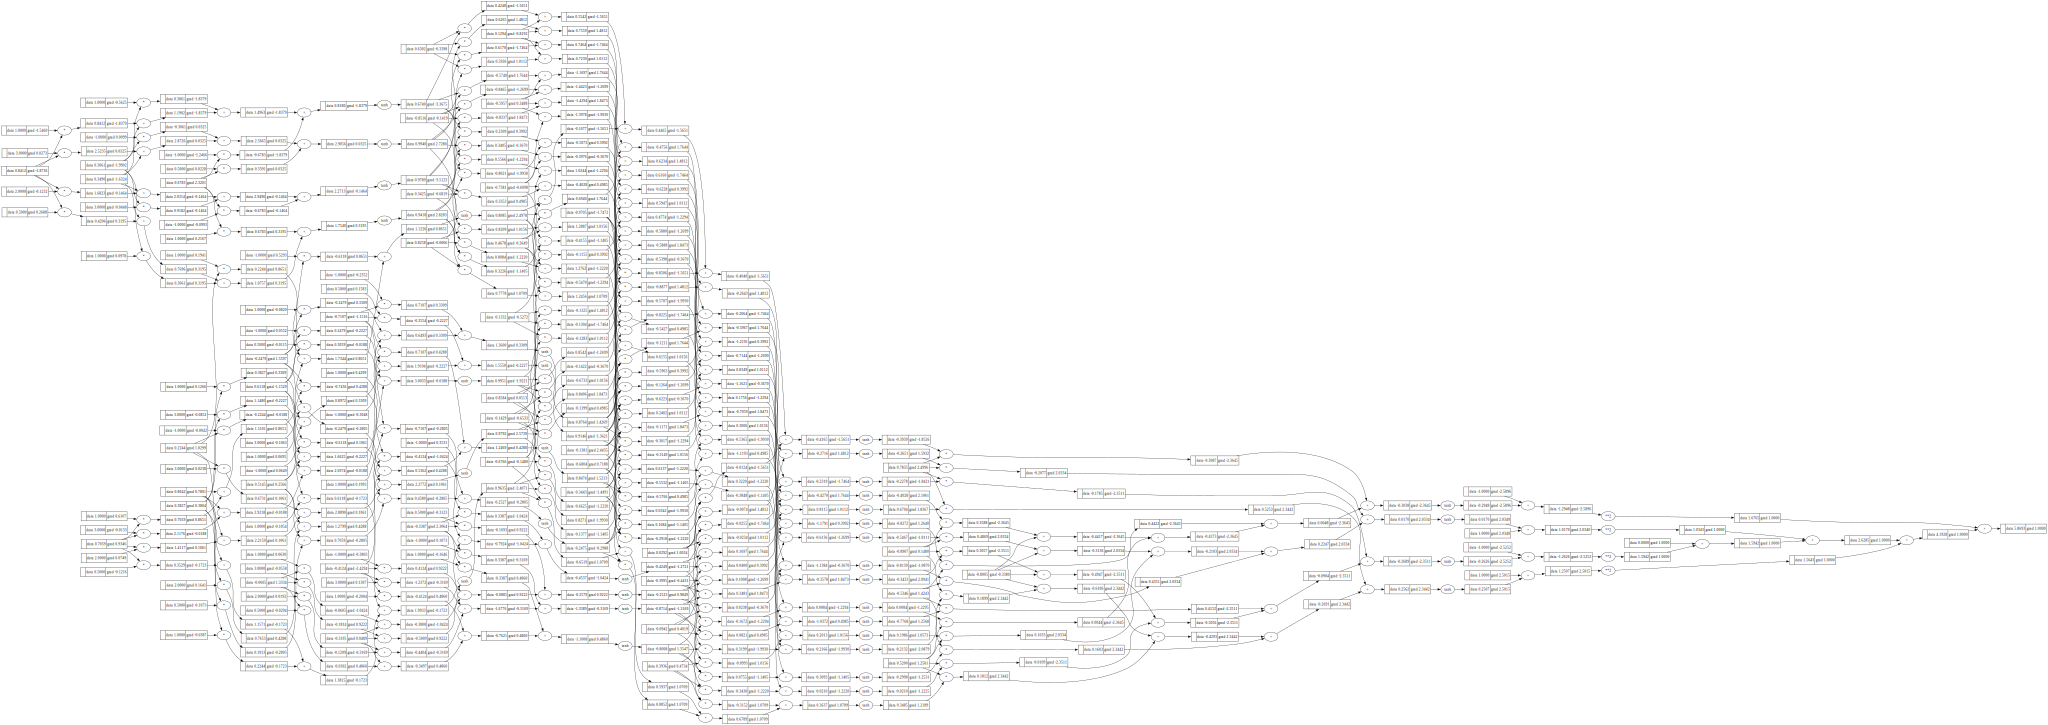

In [217]:
draw_dot(loss)

In [307]:
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        # w* x + b
        # sum actually can take one more parameter which
        # can start the sum from that value 
        # This is equivalent to sum(wi*xi for wi, xi in zip(self.w,x)) + self.b
        # to this sum(wi*xi for wi, xi in zip(self.w,x), self.b)
        act = sum([wi*xi for wi, xi in zip(self.w,x)], self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x) # This calls the __call__ function (no pun intended)

Value(data = 0.8992097077849792 , Label = )

In [308]:
print(len(n.parameters()))

41


In [309]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0 , -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # Desired targets

In [276]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt , yout in zip(ys, ypred)])
loss

Value(data = 6.465740105831914 , Label = )

In [277]:
loss.backward()

In [278]:
lr = 0.02
for p in n.parameters():
    p.data-= lr * p.grad

In [279]:
n.layers[0].neurons[0].w[0].data

-0.7026934395017919

In [280]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt , yout in zip(ys, ypred)])
loss

Value(data = 6.5901822523658105 , Label = )

In [281]:
ypred

[Value(data = -0.8191812790113812 , Label = ),
 Value(data = -0.9677870534280787 , Label = ),
 Value(data = -0.9216432852628275 , Label = ),
 Value(data = -0.8093049156482932 , Label = )]

In [310]:
epoch = 20
lr = 0.05
for e in range(epoch):
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt)**2 for ygt , yout in zip(ys, ypred)])
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    for p in n.parameters():
        p.data-= lr * p.grad

    print(e, loss.data)

0 6.094801367058747
1 2.518201782629451
2 0.44628187717415524
3 0.14073245876252435
4 0.11022067599220921
5 0.09096803632553628
6 0.0774994382707047
7 0.06749398385815533
8 0.0597531559445536
9 0.05358247960521888
10 0.048547773040696095
11 0.04436232085604315
12 0.04082869430628601
13 0.03780632901468793
14 0.03519236011594275
15 0.032909752922484076
16 0.03089966623468056
17 0.02911637950695367
18 0.02752383002951634
19 0.02609319268702585


In [311]:
ypred

[Value(data = 0.9622773804356511 , Label = ),
 Value(data = -0.9234686343646751 , Label = ),
 Value(data = -0.8934953852256432 , Label = ),
 Value(data = 0.9135713371271583 , Label = )]

In [312]:
ys

[1.0, -1.0, -1.0, 1.0]